### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-07,483463,5480300,836605,619654,300101,150223,138697,308258,126195,113905,89934,130250,131821,4849,202981
2022-01-08,483790,5485330,837266,619654,300303,150537,138881,309041,126337,113982,89934,130288,131847,4849,203019
2022-01-09,483936,5489287,837665,620251,300334,150634,139038,309787,126427,114033,89934,130338,131878,4849,203019
2022-01-10,484213,5495713,839500,620366,300334,150712,139265,310513,126707,114127,90136,130395,131915,4849,203067
2022-01-11,484213,5504387,842141,620507,300574,151093,139559,311281,127048,114739,90383,130460,131940,4849,203157


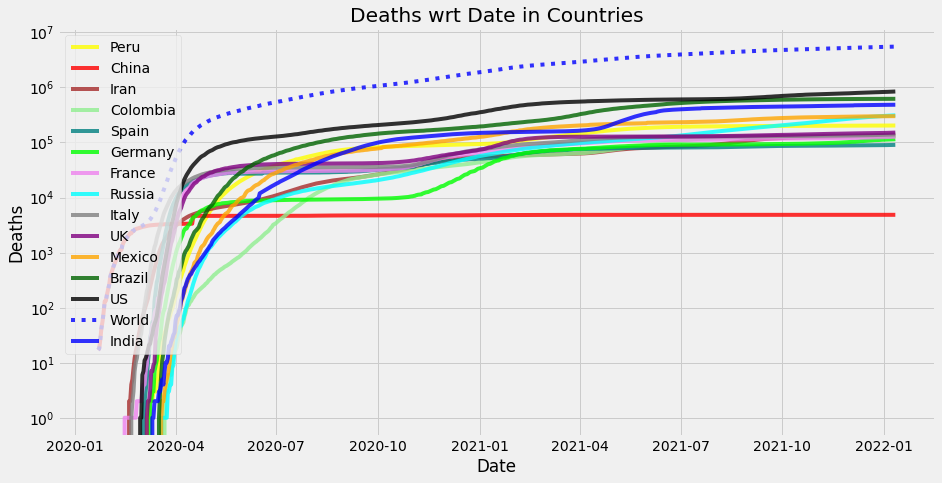

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-07,141986,2914817,900832,0,28023,180066,108297,16608,328246,52621,242440,26190,1178,176,12833
2022-01-08,159632,2064351,378732,0,30671,141251,197535,16424,303669,32128,0,31170,701,186,16135
2022-01-09,179723,2008436,323142,200931,11599,141702,155642,16111,296097,21839,0,30630,1480,173,0
2022-01-10,168063,3286345,1465525,33921,0,145230,117405,15699,93941,16618,292394,27105,1932,198,17128
2022-01-11,0,2868669,752387,73255,44678,117337,220519,17396,368817,120271,134942,23074,1961,238,36764


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-07,35849,1437584,416307,5993,8394,134345,82572,22666,143458,40492,78473,8574,2166,153,4099
2022-01-08,44101,1479368,413802,5593,9879,134805,90236,22249,154138,39934,73242,10080,2068,155,4901
2022-01-09,53143,1514640,407758,18616,9994,135265,94597,21840,163602,38728,68359,11450,2029,156,4574
2022-01-10,60804,1632753,478276,19636,9327,135929,96117,21431,158958,37254,83294,12494,2023,159,5411
2022-01-11,56750,1715148,496550,23210,11684,134690,104411,21162,172949,42788,86738,13199,2018,164,7501


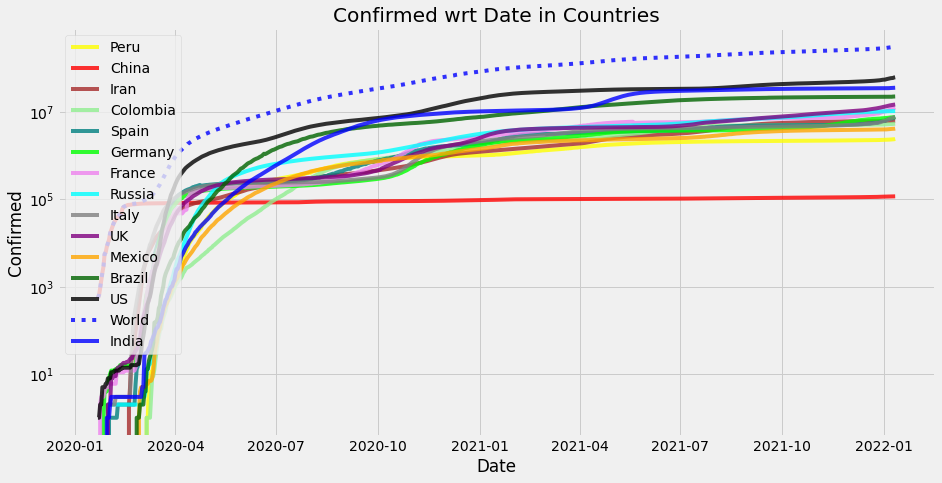

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-07,285,7269,2615,0,131,230,223,770,193,269,97,59,19,0,47
2022-01-08,327,5030,661,0,202,314,184,783,142,77,0,38,26,0,38
2022-01-09,146,3957,399,597,31,97,157,746,90,51,0,50,31,0,0
2022-01-10,277,6426,1835,115,0,78,227,726,280,94,202,57,37,0,48
2022-01-11,0,8674,2641,141,240,381,294,768,341,612,247,65,25,0,90


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2022-01-07,303.49,6600.32,1592.40,70.55,123.42,158.29,172.99,860.29,200.48,287.34,68.56,43.79,36.35,0.0,41.53
2022-01-08,306.43,6404.03,1475.97,61.73,133.24,177.75,174.37,850.63,193.17,261.05,59.99,43.07,35.06,0.0,41.09
2022-01-09,286.38,6098.15,1341.35,128.64,120.46,167.66,172.20,837.55,180.27,234.79,52.49,43.94,34.55,0.0,35.95
2022-01-10,285.21,6139.13,1403.06,126.93,105.41,156.45,179.05,823.61,192.74,217.19,71.18,45.57,34.85,0.0,37.46
2022-01-11,249.55,6455.99,1557.80,128.69,122.23,184.52,193.42,816.66,211.27,266.54,93.16,48.00,33.62,0.0,44.03


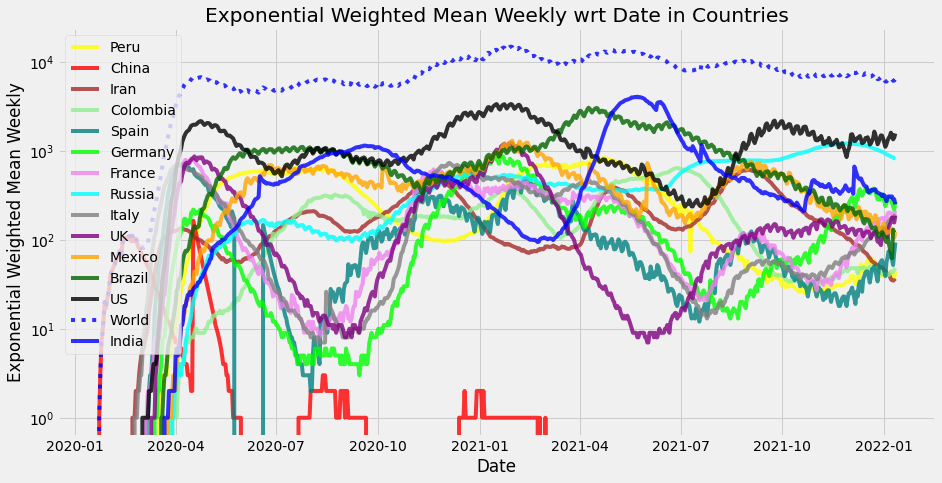

In [18]:
plotter(np.round(AVG), name)

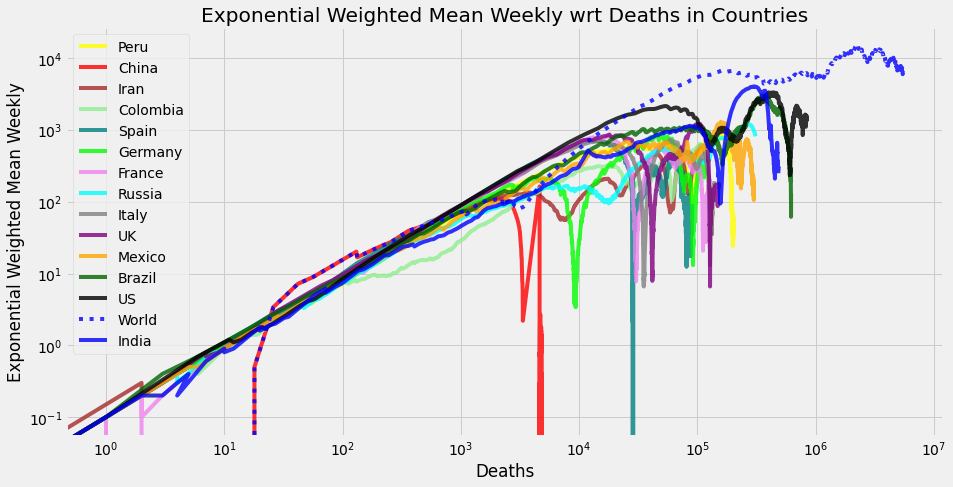

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

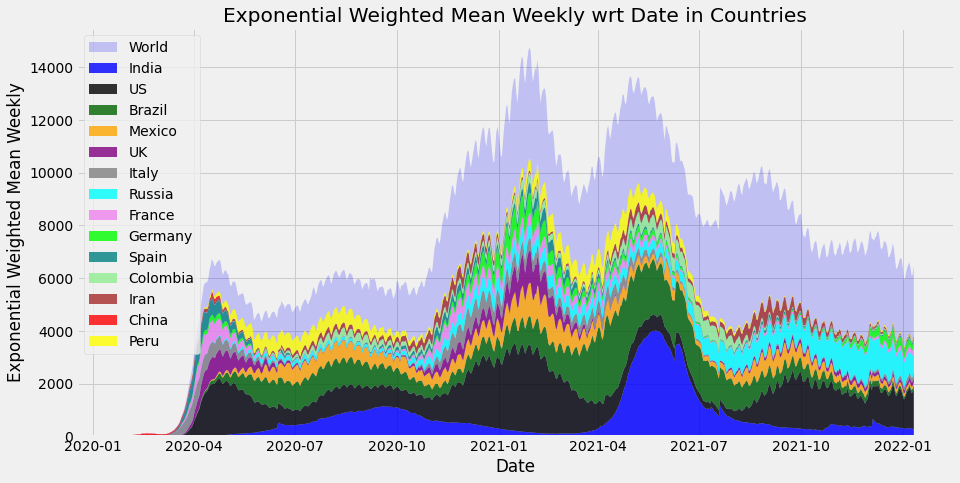

In [20]:
stackplotter(AVG, name)

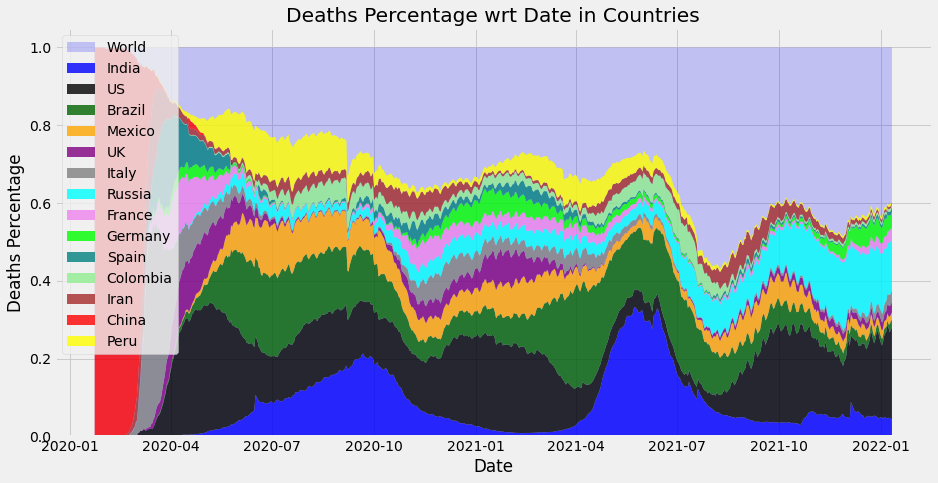

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

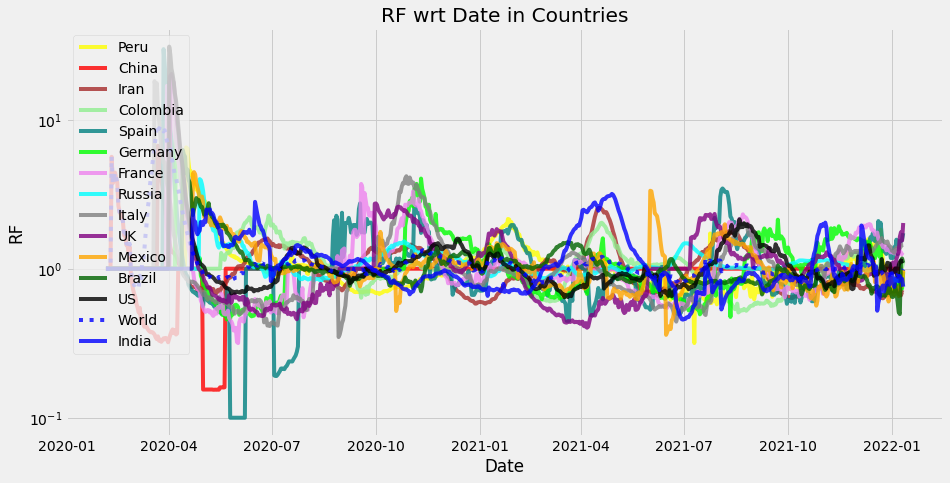

In [23]:
plotter(Reproductivity, 'RF')

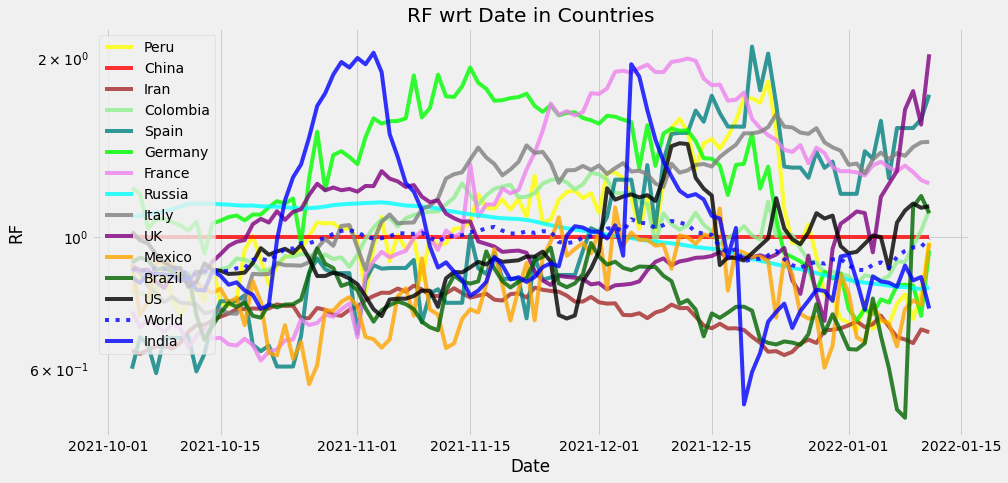

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

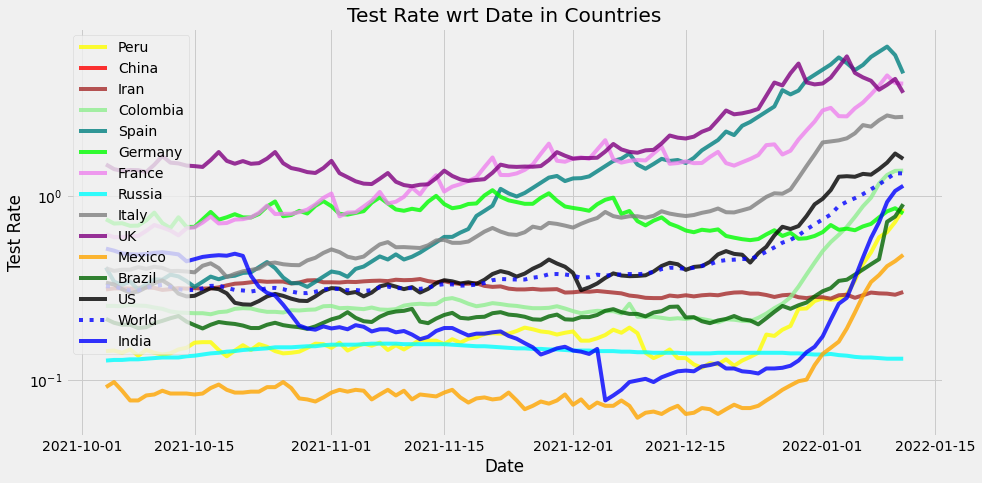

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

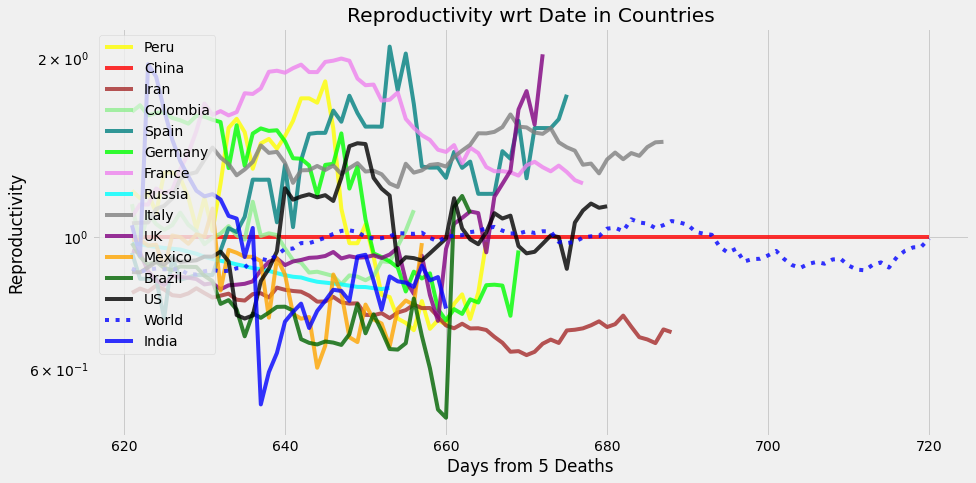

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

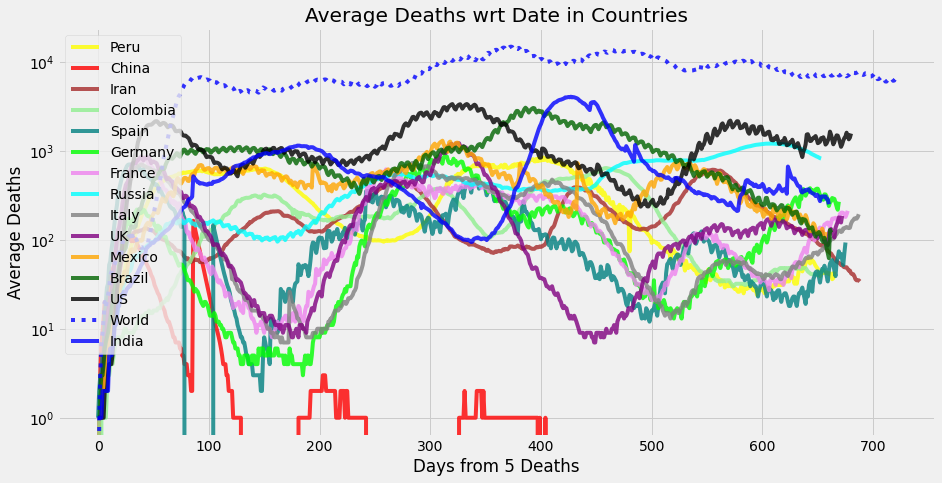

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

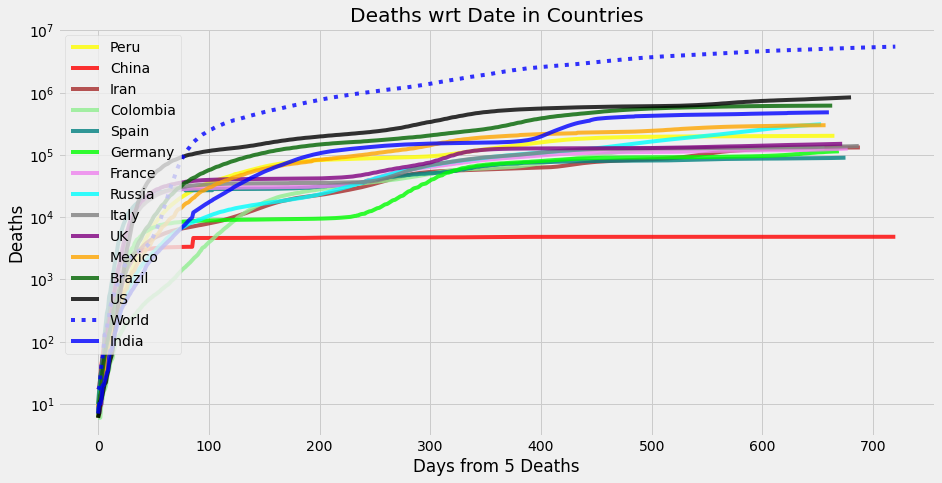

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5504387,8674,6626.86,6455.99,0.9933,313498180,1.328,1715148,1100.88
US,842141,2641,1715.29,1557.80,1.1254,62308472,1.594,496550,168.43
Brazil,620507,141,121.86,128.69,1.0956,22636359,0.902,23210,124.10
India,484213,0,237.43,249.55,0.7575,35875790,1.137,56750,96.84
Russia,311281,768,767.86,816.66,0.8204,10503101,0.130,21162,62.26
Mexico,300574,240,123.29,122.23,0.9759,4170066,0.478,11684,60.11
Peru,203157,90,41.43,44.03,0.9798,2412577,0.852,7501,40.63
UK,151093,381,239.43,184.52,2.0268,14826336,3.650,134690,30.22
Indonesia,144144,8,5.57,5.73,1.0000,4267451,NaN,352,28.83


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5504387,8674,6626.86,6455.99,0.9933,313498180,1.328,1715148,1100.88
US,842141,2641,1715.29,1557.80,1.1254,62308472,1.594,496550,168.43
Russia,311281,768,767.86,816.66,0.8204,10503101,0.130,21162,62.26
Poland,100254,493,317.14,326.23,0.8761,4232386,0.205,13387,20.05
Germany,114739,612,258.57,266.54,0.9484,7690632,0.803,42788,22.95
UK,151093,381,239.43,184.52,2.0268,14826336,3.650,134690,30.22
India,484213,0,237.43,249.55,0.7575,35875790,1.137,56750,96.84
Vietnam,34787,256,220.29,224.17,0.9891,1930428,0.378,16941,6.96
Italy,139559,294,216.29,193.42,1.4443,7774863,2.699,104411,27.91


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5504387


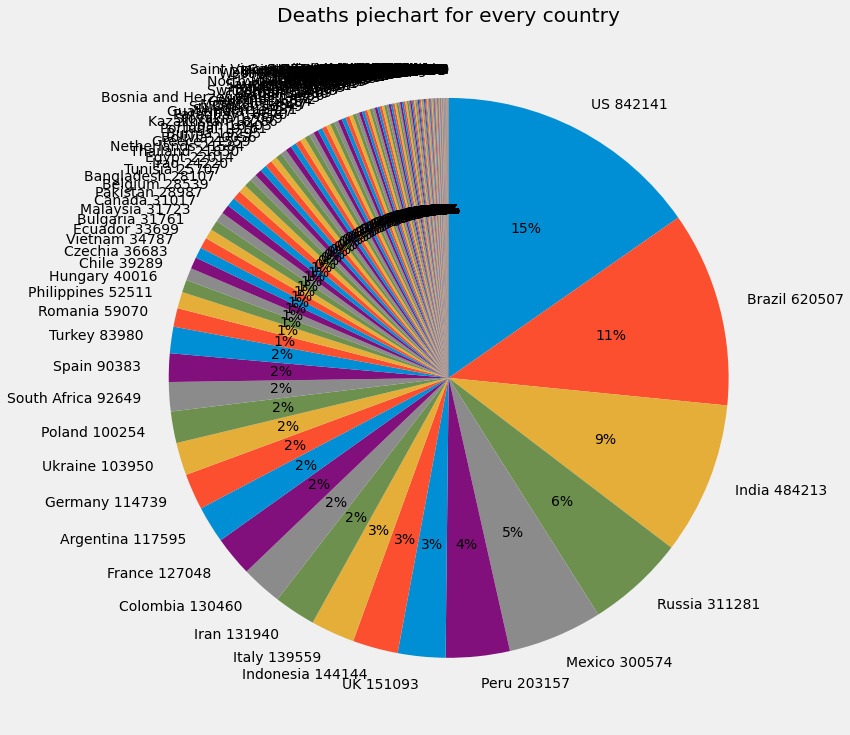

In [35]:
piechart('Deaths')

World total:  6626


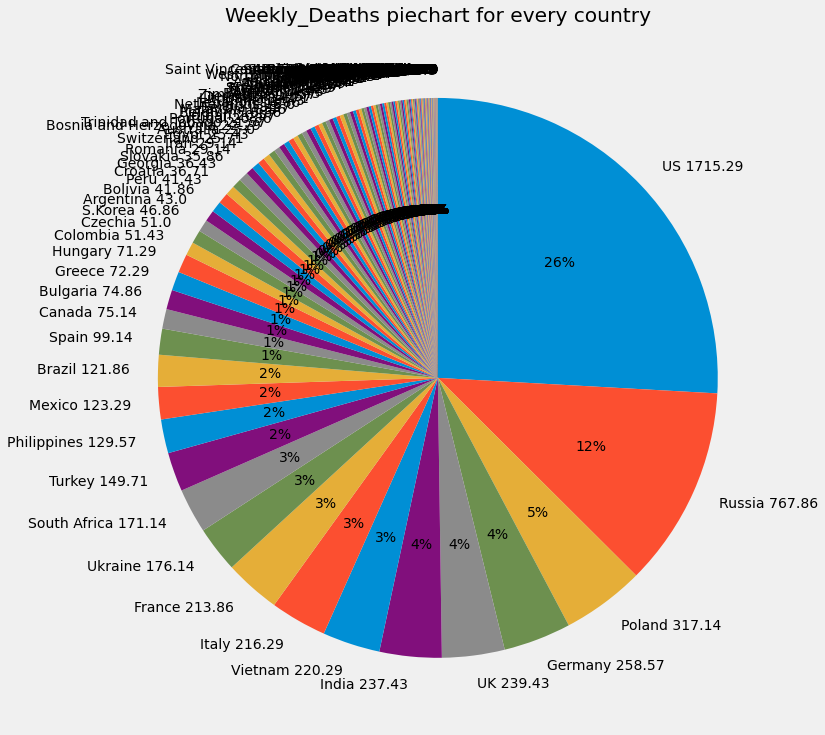

In [36]:
piechart('Weekly_Deaths')

In [ ]:
piechart('Daily_Deaths')

World total:  8674


In [ ]:
print('Today\'s Date: ', dt.datetime.now().date())

In [ ]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [ ]:
!git add .
!git commit -m "`date` update"
!git push origin master